# Classification Model for Faulty Steel Plates Using Python
### David Lowe
### June 22, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery (http://machinelearningmastery.com/)

Dataset Used: Faulty Steel Plates

Dataset ML Model: Multi-Class classification with numerical attributes

Dataset Reference: http://archive.ics.uci.edu/ml/datasets/steel+plates+faults

One potential source of performance benchmarks: https://www.kaggle.com/uciml/faulty-steel-plates

INTRODUCTION: This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, with six types of possible defects (plus "other"). The Input vector was made up of 27 indicators that approximately the geometric shape of the defect and its outline. According to the research paper, Semeion was commissioned by the Centro Sviluppo Materiali (Italy) for this task and therefore it is not possible to provide details on the nature of the 27 indicators used as Input vectors or the types of the 6 classes of defects.

CONCLUSION: The baseline performance of the 10 algorithms achieved an average accuracy of 60.92%. Three algorithms (Bagged Decision Trees, Extra Trees, and Stochastic Gradient Boosting) achieved the top three accuracy scores after the first round of modeling. After a series of tuning trials, the top result achieved using the training data was from Stochastic Gradient Boosting. It achieved an average accuracy of 78.05%. Using the optimized tuning parameter available, the Stochastic Gradient Boosting processed the validation dataset with an accuracy of 80.10%, which was slightly better than with the training data alone. For this project, the Stochastic Gradient Boosting ensemble algorithm yielded consistently top-notch training and validation results, which warrant the additional processing required by the algorithm.

The purpose of this project is to analyze predictions using various machine learning algorithms and to document the steps using a template. Working through machine learning problems from end-to-end requires a structured modeling approach. Working problems through a project template can also encourage us to think about the problem more critically, to challenge our assumptions, and to get proficient at all parts of a modeling project.

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem

### 1.a) Load ibraries

In [1]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

inputFile = 'faults.csv'
entireDataset = read_csv(inputFile)

# First we need to reverse the one-hot-encoding effect for the class variable
entireDataset['targetVar'] = 7
entireDataset['targetVar'] = numpy.where(entireDataset['Pastry']==1, 1, entireDataset['targetVar'])
entireDataset['targetVar'] = numpy.where(entireDataset['Z_Scratch']==1, 2, entireDataset['targetVar'])
entireDataset['targetVar'] = numpy.where(entireDataset['K_Scatch']==1, 3, entireDataset['targetVar'])
entireDataset['targetVar'] = numpy.where(entireDataset['Stains']==1, 4, entireDataset['targetVar'])
entireDataset['targetVar'] = numpy.where(entireDataset['Dirtiness']==1, 5, entireDataset['targetVar'])
entireDataset['targetVar'] = numpy.where(entireDataset['Bumps']==1, 6, entireDataset['targetVar'])
entireDataset.drop('Pastry', axis=1, inplace=True)
entireDataset.drop('Z_Scratch', axis=1, inplace=True)
entireDataset.drop('K_Scatch', axis=1, inplace=True)
entireDataset.drop('Stains', axis=1, inplace=True)
entireDataset.drop('Dirtiness', axis=1, inplace=True)
entireDataset.drop('Bumps', axis=1, inplace=True)
entireDataset.drop('Other_Faults', axis=1, inplace=True)

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [3]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [4]:
print(entireDataset.head(20))

    X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0          42         50     270900     270944           267           17   
1         645        651    2538079    2538108           108           10   
2         829        835    1553913    1553931            71            8   
3         853        860     369370     369415           176           13   
4        1289       1306     498078     498335          2409           60   
5         430        441     100250     100337           630           20   
6         413        446     138468     138883          9052          230   
7         190        200     210936     210956           132           11   
8         330        343     429227     429253           264           15   
9          74         90     779144     779308          1506           46   
10        106        118     813452     813500           442           13   
11        505        515     106604     106668           284           42   

#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(1941, 28)


#### 2.a.iii) Types of the attributes.

In [6]:
print(entireDataset.dtypes)

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
targetVar                  int64
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [7]:
print(entireDataset.describe())

         X_Minimum    X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas  \
count  1941.000000  1941.000000  1.941000e+03  1.941000e+03    1941.000000   
mean    571.136012   617.964451  1.650685e+06  1.650739e+06    1893.878413   
std     520.690671   497.627410  1.774578e+06  1.774590e+06    5168.459560   
min       0.000000     4.000000  6.712000e+03  6.724000e+03       2.000000   
25%      51.000000   192.000000  4.712530e+05  4.712810e+05      84.000000   
50%     435.000000   467.000000  1.204128e+06  1.204136e+06     174.000000   
75%    1053.000000  1072.000000  2.183073e+06  2.183084e+06     822.000000   
max    1705.000000  1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
count   1941.000000   1941.000000       1.941000e+03            1941.000000   
mean     111.855229     82.965997       2.063121e+05              84.548686   
std      301.209187    426.482879       5.122936e+05        

#### 2.a.v) Summarize the levels of the class attribute.

In [8]:
print(entireDataset.groupby('targetVar').size())

targetVar
1    158
2    190
3    391
4     72
5     55
6    402
7    673
dtype: int64


#### 2.a.v) Count missing values.

In [9]:
print(entireDataset.isnull().sum())

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
targetVar                0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [10]:
attributeOnly = entireDataset.drop(columns=['targetVar'])

In [11]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

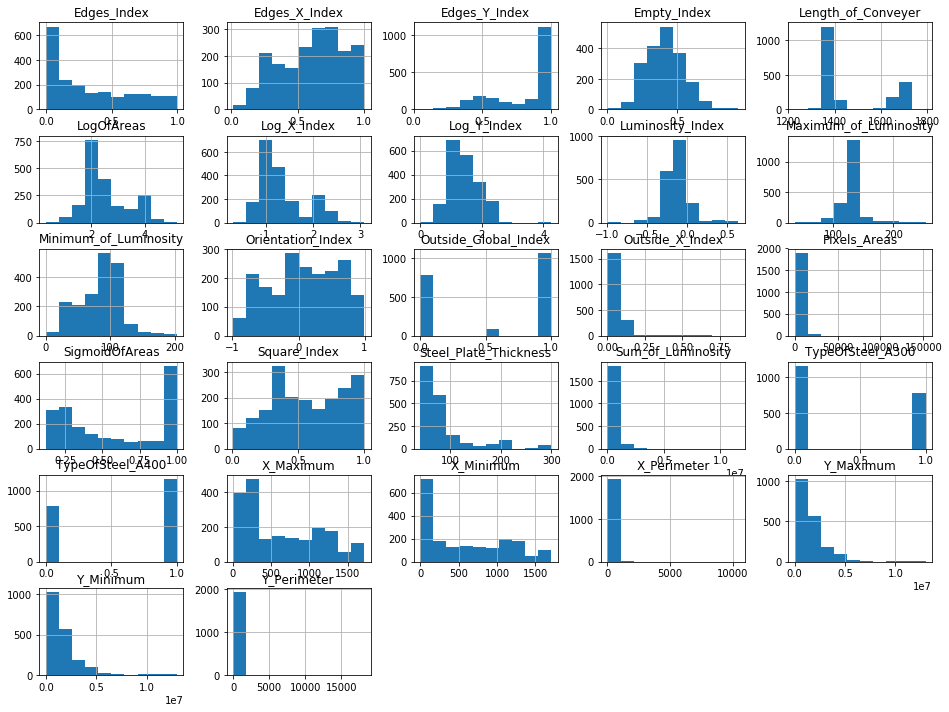

In [12]:
# Histograms for each attribute
attributeOnly.hist()
pyplot.show()

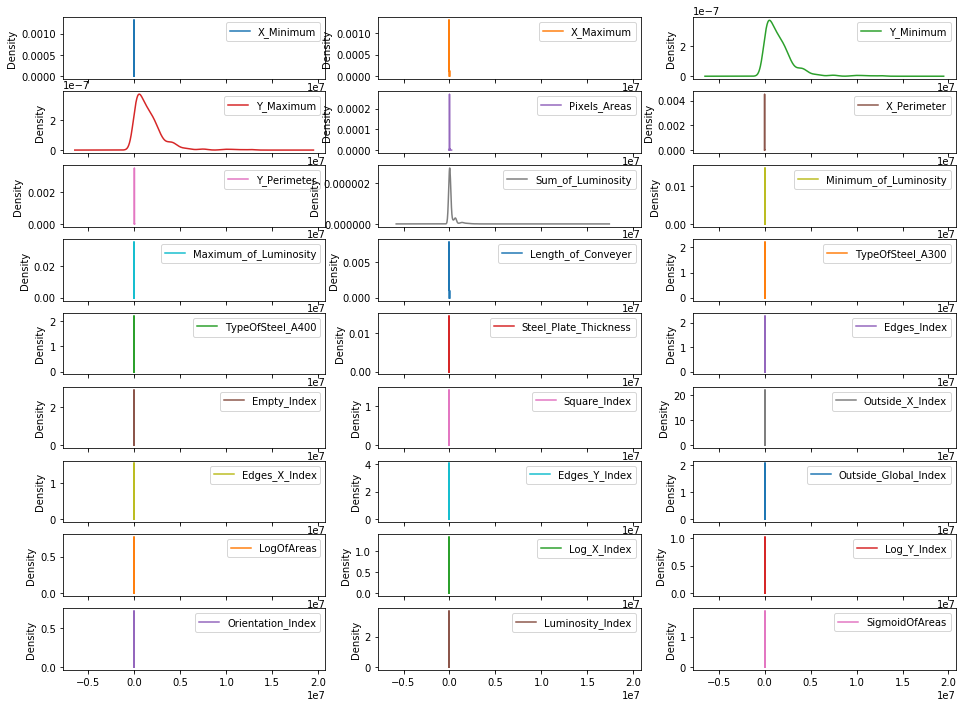

In [13]:
# Density plot for each attribute
attributeOnly.plot(kind='density', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

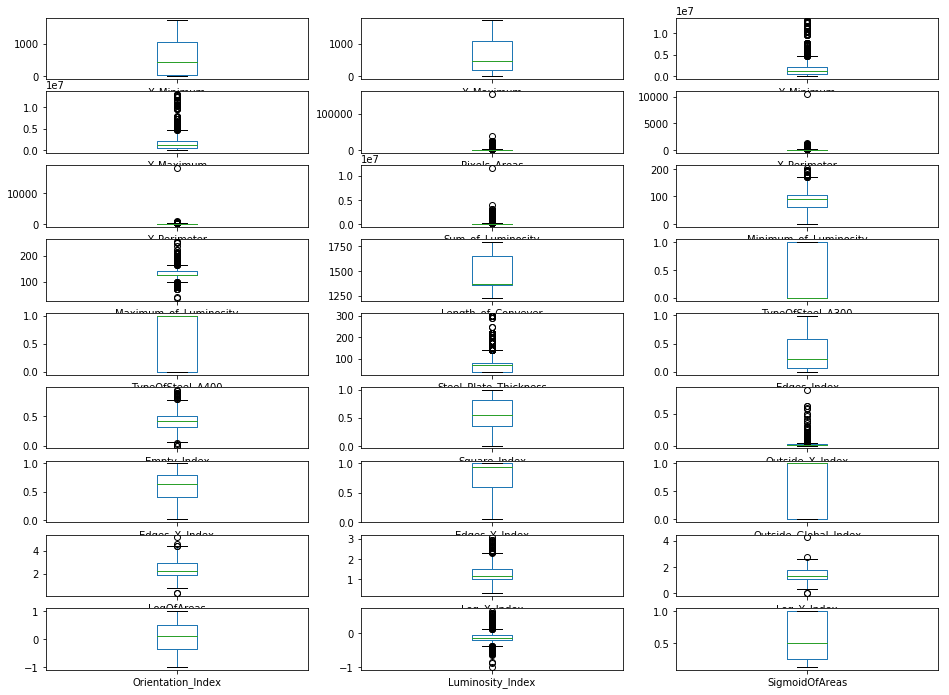

In [14]:
# Box and Whisker plot for each attribute
attributeOnly.plot(kind='box', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

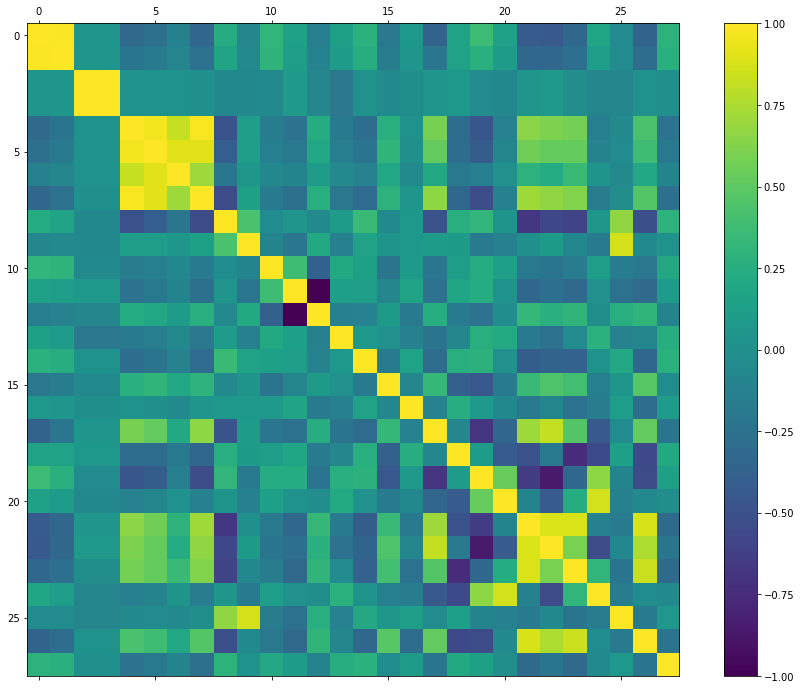

In [15]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [16]:
# Scatterplot matrix
#scatter_matrix(attributeOnly)
#pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [17]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [18]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [19]:
# Not applicable for this iteration of the project.

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [20]:
seedNum = 888
array = entireDataset.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.30
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (1941, 27) Y_entire.shape: (1941,)
X_train.shape: (1358, 27) Y_train.shape: (1358,)
X_validation.shape: (583, 27) Y_validation.shape: (583,)
Total time for data handling and visualization: 0:00:07.116282


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Linear Discriminant Analysis

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged Decision Trees, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [21]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [22]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BDT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []

In [23]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))

LDA: 0.675272 (0.048173)
Model training time: 0:00:00.043672


C:\Users\david.lowe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\david.lowe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\david.lowe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\david.lowe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\david.lowe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\david.lowe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are colli

CART: 0.715054 (0.037883)
Model training time: 0:00:00.250619
NB: 0.409401 (0.051130)
Model training time: 0:00:00.031945
KNN: 0.440458 (0.054578)
Model training time: 0:00:00.034174
SVM: 0.351280 (0.032651)
Model training time: 0:00:03.099616
BDT: 0.748943 (0.029322)
Model training time: 0:00:01.430766
RF: 0.737179 (0.042427)
Model training time: 0:00:00.365421
ET: 0.742947 (0.028968)
Model training time: 0:00:00.221535
AB: 0.496193 (0.060686)
Model training time: 0:00:01.760466
GBM: 0.776204 (0.036189)
Model training time: 0:00:17.080758


### 4.b) Spot-checking baseline algorithms

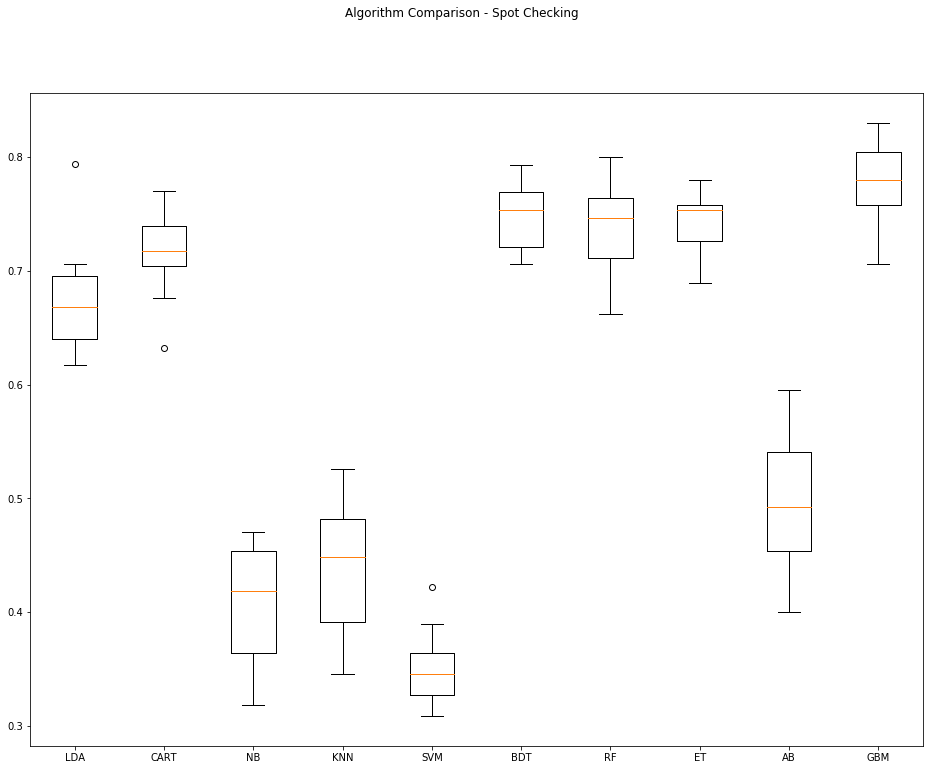

In [24]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [25]:
# Set up the comparison array
results = []
names = []

In [26]:
# Tuning algorithm #1 - Badded Decision Trees
startTimeModule = datetime.now()
paramGrid1 = dict(n_estimators=numpy.array([50,100,200,300,400]))
model1 = BaggingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('BDT')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.774669 using {'n_estimators': 200}
0.768041 (0.038970) with: {'n_estimators': 50}
0.773932 (0.035900) with: {'n_estimators': 100}
0.774669 (0.035590) with: {'n_estimators': 200}
0.774669 (0.038792) with: {'n_estimators': 300}
0.774669 (0.037046) with: {'n_estimators': 400}
Model training time: 0:02:19.425040


In [27]:
# Tuning algorithm #2 - Extra Trees
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=numpy.array([50,100,200,300,400]))
model2 = ExtraTreesClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('ET')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.769514 using {'n_estimators': 200}
0.765096 (0.038669) with: {'n_estimators': 50}
0.767305 (0.039431) with: {'n_estimators': 100}
0.769514 (0.040506) with: {'n_estimators': 200}
0.765832 (0.039157) with: {'n_estimators': 300}
0.768041 (0.035009) with: {'n_estimators': 400}
Model training time: 0:00:23.938201


In [28]:
# Tuning algorithm #3 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=numpy.array([100,250,500,600,750]))
model3 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.780560 using {'n_estimators': 250}
0.776141 (0.036177) with: {'n_estimators': 100}
0.780560 (0.028452) with: {'n_estimators': 250}
0.778351 (0.028734) with: {'n_estimators': 500}
0.778351 (0.031883) with: {'n_estimators': 600}
0.777614 (0.030901) with: {'n_estimators': 750}
Model training time: 0:04:51.933686


### 5.b) Compare Algorithms After Tuning

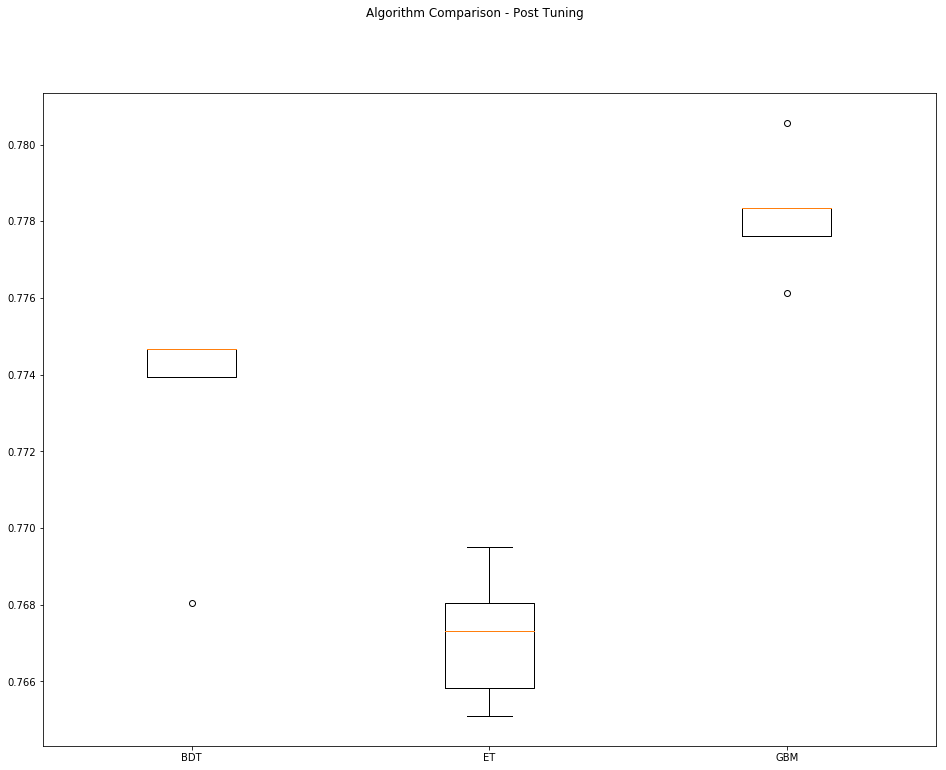

In [29]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [30]:
model = GradientBoostingClassifier(n_estimators=250, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8010291595197255
[[ 28   0   0   0   0   3  16]
 [  0  57   0   0   0   0   1]
 [  0   0 109   0   0   0   6]
 [  0   0   0  21   0   0   2]
 [  0   0   0   0  13   0   4]
 [  4   0   0   0   0  82  41]
 [ 11   1   1   3   0  23 157]]
             precision    recall  f1-score   support

        1.0       0.65      0.60      0.62        47
        2.0       0.98      0.98      0.98        58
        3.0       0.99      0.95      0.97       115
        4.0       0.88      0.91      0.89        23
        5.0       1.00      0.76      0.87        17
        6.0       0.76      0.65      0.70       127
        7.0       0.69      0.80      0.74       196

avg / total       0.81      0.80      0.80       583



### 6.b) Create standalone model on entire training dataset

In [31]:
startTimeModule = datetime.now()
finalModel = GradientBoostingClassifier(n_estimators=250)
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:25.459280


### 6.c) Save model for later use

In [32]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:08:36.982430
